In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import time

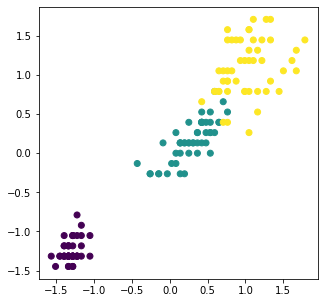

In [2]:
iris = datasets.load_iris()
X = iris.data[:, 2:]
y = iris.target

scaler = StandardScaler()
X = scaler.fit_transform(X)


idx = np.arange(0,len(X),1)
np.random.shuffle(idx)
idx_train = idx[0:int(.7*len(X))]
idx_test = idx[len(idx_train):len(idx)]

X_train = X[idx_train]
X_test = X[idx_test]
y_train = y[idx_train]
y_test = y[idx_test]

X_train = np.insert(X_train, 0, 1, axis=1)
X_test = np.insert(X_test, 0, 1, axis=1)

k = len(set(y))
m = X_train.shape[0]
n = X_train.shape[1]
Y_train_encoded = np.zeros((m, k))
for each_class in range(k):
    cond = y_train == each_class
    Y_train_encoded[np.where(cond), each_class] = 1

plt.figure(figsize=(5,5))
plt.scatter(X[:, 0], X[:, 1], label='class 0', c=y)
plt.show()

In [3]:
print(X_train.shape, X_test.shape, Y_train_encoded.shape, y_test.shape)

(105, 3) (45, 3) (105, 3) (45,)


In [4]:
class LogisticRegression():
    
    def __init__(self, k, method, alpha=0.001, max_iters=1000):
        self.method = method
        self.alpha = alpha
        self.max_iters = max_iters
        self.k = k
        
    def softmax(self, theta_T_X):
        return np.exp(theta_T_X) / np.sum(np.exp(theta_T_X), axis=1, keepdims=True)
    
    def h_theta(self, X):
        return self.softmax(X @ self.W)
    
    def gradient(self,X, Y):
        h = self.h_theta(X)
        error = h - Y
        grad = X.T @ error
        loss = -np.sum(Y * np.log(h)) / X.shape[0]
        return grad, loss
    
    def predict(self, X):
        return np.argmax(self.h_theta(X), axis=1)
    
    def plot(self):
        plt.plot(self.iter, self.losses, label='Training losses')
        plt.xlabel('iterations')
        plt.ylabel('Training loss')
        plt.title('Training loss vs iterations')
        plt.legend()
        
    def fit(self,X, Y):
        self.W = np.zeros((X.shape[1], self.k))
        self.losses = []
        self.iter = []
        
        if self.method == 'batch':
            start_time = time.time()
            for i in range(self.max_iters):
                grad, cost = self.gradient(X, Y)
                self.W = self.W - self.alpha * grad
                if i % 500 == 0:
                    print(f"Cost at iterations {i}", cost)
                    self.losses.append(cost)
                    self.iter.append(i)
            end_time = time.time()
            print(f"Time taken for batch {end_time - start_time}")
            
        elif self.method == 'sto':
            start_time = time.time()
            used_ix = []
            for i in range(self.max_iters):
                ix = np.random.randint(X.shape[0])
                while ix in used_ix:
                    ix = np.random.randint(X.shape[0])
                used_ix.append(ix)
                if len(used_ix) == X.shape[0]:
                    used_ix = []
                Xi = X[ix, :].reshape(1, -1)
                Yi = Y[ix]
                grad, cost = self.gradient(Xi, Yi)
                self.W = self.W - self.alpha * grad
                if i % 500 == 0:
                    print(f"Cost at iterations {i}", cost)
                    self.losses.append(cost)
                    self.iter.append(i)
            end_time = time.time()
            print(f"Time taken for sto {end_time - start_time}")
            
        elif self.method == 'mini-batch':
            start_time = time.time()
            batch_size = int(0.1 * X.shape[0])
            for i in range(self.max_iters):
                shuffle_index = np.random.permutation(X.shape[0])
                X_shuffled = X[shuffle_index]
                Y_shuffled = Y[shuffle_index]
                for index in range(0, X.shape[0], batch_size):
                    Xi = X_shuffled[index : index + batch_size]
                    Yi = Y_shuffled[index : index + batch_size]
                    grad, cost = self.gradient(Xi, Yi)
                    self.W = self.W - self.alpha * grad
                if i % 500 == 0:
                    print(f"Cost at iterations {i}", cost)
                    self.losses.append(cost)
                    self.iter.append(i)
            end_time = time.time()
            print(f"Time taken for mini-batch {end_time - start_time}")
        
        else:
            raise ValueError('Method must be one of the followings: "batch", "mini-batch", "sto".')
            
                
            

Cost at iterations 0 1.0986122886681098
Cost at iterations 500 0.19365074491347684
Cost at iterations 1000 0.14541536050787288
Cost at iterations 1500 0.12574612021514495
Cost at iterations 2000 0.11481432610670302
Cost at iterations 2500 0.10778117536395922
Cost at iterations 3000 0.10285049818017808
Cost at iterations 3500 0.09919274138120326
Cost at iterations 4000 0.09636850542247921
Cost at iterations 4500 0.09412190146240067
Cost at iterations 5000 0.09229314187417174
Cost at iterations 5500 0.09077695669836164
Cost at iterations 6000 0.08950098465347213
Cost at iterations 6500 0.08841374097330887
Cost at iterations 7000 0.08747753438685482
Cost at iterations 7500 0.08666410185959664
Cost at iterations 8000 0.08595181272923622
Cost at iterations 8500 0.08532381834185175
Cost at iterations 9000 0.08476679234451984
Cost at iterations 9500 0.08427005172374769
Time taken for batch 0.3373434543609619
Classification
Report:                precision    recall  f1-score   support

      

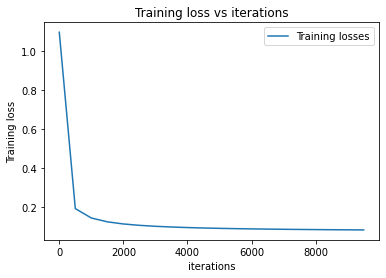

In [5]:
model = LogisticRegression(k, method = 'batch', max_iters=10000)
model.fit(X_train, Y_train_encoded)
model.plot()
yhat = model.predict(X_test)
print("="*20)
print("Classification")
print(f"Report: ",classification_report(y_test, yhat))

Cost at iterations 0 1.0986122886681098
Cost at iterations 500 0.8363445861467987
Cost at iterations 1000 0.5519704068809358
Cost at iterations 1500 1.0597211721778783
Cost at iterations 2000 1.045004599043248
Cost at iterations 2500 0.3123511236450373
Cost at iterations 3000 0.25218279754969364
Cost at iterations 3500 0.20727181301611539
Cost at iterations 4000 0.19597755322239832
Cost at iterations 4500 0.2719637597685978
Cost at iterations 5000 0.4011452771695041
Cost at iterations 5500 0.18754261406847655
Cost at iterations 6000 0.22520051300616295
Cost at iterations 6500 0.8483881851690339
Cost at iterations 7000 0.3643173933194227
Cost at iterations 7500 0.2333172377826283
Cost at iterations 8000 0.8606641166455801
Cost at iterations 8500 0.10875334629897607
Cost at iterations 9000 0.6768964188597852
Cost at iterations 9500 0.6784971083419754
Time taken for sto 0.38846468925476074
Classification
Report:                precision    recall  f1-score   support

           0       1.

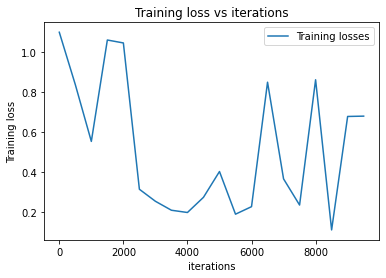

In [6]:
model = LogisticRegression(k, method = 'sto', max_iters=10000)
model.fit(X_train, Y_train_encoded)
model.plot()
yhat = model.predict(X_test)
print("="*20)
print("Classification")
print(f"Report: ",classification_report(y_test, yhat))

Cost at iterations 0 1.0422652374591526
Cost at iterations 500 0.15617491573627976
Cost at iterations 1000 0.2694334328197841
Cost at iterations 1500 0.25588464529967286
Cost at iterations 2000 0.07746835160101415
Cost at iterations 2500 0.056945818568947225
Cost at iterations 3000 0.015121601676152304
Cost at iterations 3500 0.03434838719521235
Cost at iterations 4000 0.04936716309235164
Cost at iterations 4500 0.1171604905643279
Cost at iterations 5000 0.23761192759403568
Cost at iterations 5500 0.012786438095926717
Cost at iterations 6000 0.024872490367866356
Cost at iterations 6500 0.11692586118445836
Cost at iterations 7000 0.01847167397847087
Cost at iterations 7500 0.008573504236692793
Cost at iterations 8000 0.01038066779981801
Cost at iterations 8500 0.05174179366514
Cost at iterations 9000 0.012109714648538442
Cost at iterations 9500 0.23622321136734295
Time taken for mini-batch 2.1349234580993652
Classification
Report:                precision    recall  f1-score   support



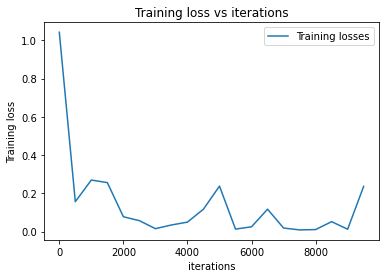

In [7]:
model = LogisticRegression(k, method = 'mini-batch', max_iters=10000)
model.fit(X_train, Y_train_encoded)
model.plot()
yhat = model.predict(X_test)
print("="*20)
print("Classification")
print(f"Report: ",classification_report(y_test, yhat))

In [8]:
model = LogisticRegression(k, method = 'Death Vader', max_iters=10000)
model.fit(X_train, Y_train_encoded)
model.plot()
yhat = model.predict(X_test)
print("="*20)
print("Classification")
print(f"Report: ",classification_report(y_test, yhat))

ValueError: Method must be one of the followings: "batch", "mini-batch", "sto".

Amoung the three method, the training loss (cost function) with batch gradient descent dramatically drop at the first 600 iterations and after that the change is nearly 0. So, we can stop at iteration around 600 and the final parameters values are optimal. In SGD, the cost function is bouncing up and down, decreasing only on average becasue it computes based only on the signle instance. The final paramters values are good, but not optimal. On the other hand, the cost function with mini-batch is still bouncing up and down but much lesser than SGD. 

As our training sample size is only 105, batch gradienct descent is the fastest followed by SGD and mini-batch. if our training sample is very large, SGD and mini-batch will be faster than batch gradient descent.